# Упражнения
В этом упражнении рассматривается прогноз SARIMA, аналогичный тому, который был сделан для набора данных $CO_2$.



In [ ]:
!pip install pmdarima

In [1]:
# 
import pandas as pd
import numpy as np
%matplotlib inline

# импорт SARIMAX 
from statsmodels.tsa.statespace.sarimax import SARIMAX

from statsmodels.graphics.tsaplots import plot_acf,plot_pacf # для определения (p,q) 
from statsmodels.tsa.seasonal import seasonal_decompose      # для ETS графиков
from pmdarima import auto_arima                              # для поиска ARIMA моделей

# метрики
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse

# для игнорирования предупреждений (опционально)
import warnings
warnings.filterwarnings("ignore")

# Загрузка датасета
df = pd.read_csv('./HospitalityEmployees.csv',index_col='Date',parse_dates=True)
df.index.freq = 'MS'
print(len(df))
print(df.head())

348
            Employees
Date                 
1990-01-01     1064.5
1990-02-01     1074.5
1990-03-01     1090.0
1990-04-01     1097.4
1990-05-01     1108.7


В <tt>df</tt>  348 записей и 1 колонка. Данные представляют собой численность сотрудников в тысячах человек в среднем за месяц с января 1990 года по декабрь 2018 года.

### 1. Постройте график временного ряда


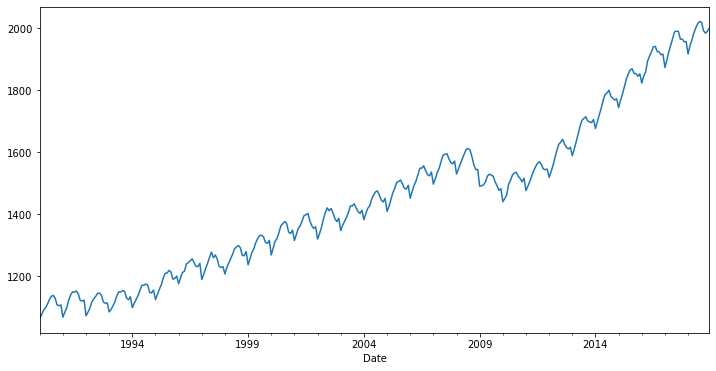

In [6]:
## Постройте график атрибута 'Employees'

df['Employees'].plot(figsize=(12,6)).autoscale(axis='x',tight=True)

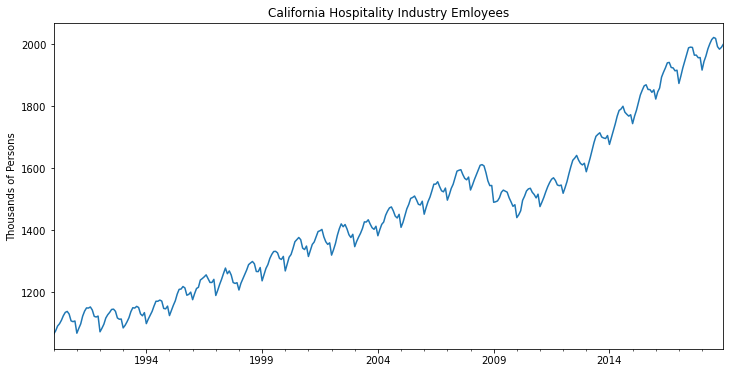

In [7]:
# добавьте заголовок и подписи
title='California Hospitality Industry Emloyees'
ylabel='Thousands of Persons'
xlabel='' 

ax = df['Employees'].plot(figsize=(12,6),title=title)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel);

### 2. Выполните ETS декомпозицию
Используя аддитивную модель ('additive').
Подсказка: функция seasonal_decompose

In [2]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(df['Employees'], model='add')

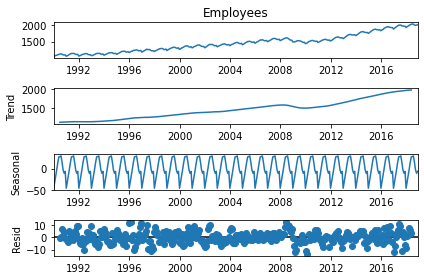

In [3]:
# отобразите результат
result.plot();

### 3. Запустите <tt>pmdarima.auto_arima</tt> чтобы получить набор параметров
Это может занять некоторое время, так как необходимо оценить множество комбинаций.

In [ ]:
# Подсказка: используйте auto_arima

In [2]:
auto_arima(df['Employees'], seasonal=True, m=12).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  348
Model:             SARIMAX(1, 1, 2)x(1, 0, [1], 12)   Log Likelihood               -1098.252
Date:                              Mon, 07 Mar 2022   AIC                           2208.504
Time:                                      00:53:06   BIC                           2231.600
Sample:                                           0   HQIC                          2217.700
                                              - 348                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9246      0.045     20.572      0.000       0.836       1.013
ma.L1         -0.9441      0.070    -13.541      0.000      -1.081      -0.807
ma.L2          0.1287      0.060      2.157      0.031       0.012       0.246
ar.S.L12       0.9972      0.001    706.317      0.000       0.994       1.000
ma.S.L12      -0.7494      0.043    -17.353      0.000      -0.834      -0.665
sigma2        29.2905      1.716     17.068      0.000      25.927      32.654
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                67.40
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               0.86   Skew:                            -0.11
Prob(H) (two-sided):                  0.40   Kurtosis:                         5.15
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Ожидаемый результат ARIMA (0,1,0) с сезонностью (2,0,0,12).
(ваш результат может отличаться)
### 4. Разделите данные на train/test 
Установите один (последний) год (12 записей) для тестирования. Есть несколько способов сделать это!

In [3]:
train = df.iloc[:336]
test = df.iloc[336:]


In [4]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

### 5. Обучите SARIMA(0,1,0)(2,0,0,12) на train['Employees']

In [5]:
model = SARIMAX(train['Employees'], order=(1, 1, 2), seasonal_order=(1, 0, 1, 12))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                            Employees   No. Observations:                  336
Model:             SARIMAX(1, 1, 2)x(1, 0, [1], 12)   Log Likelihood               -1058.058
Date:                              Mon, 07 Mar 2022   AIC                           2128.116
Time:                                      00:53:43   BIC                           2151.001
Sample:                                  01-01-1990   HQIC                          2137.240
                                       - 12-01-2017                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9242      0.043     21.287      0.000       0.839       1.009
ma.L1         -0.9584      0.070    -13.634      0.000      -1.096      -0.821
ma.L2          0.1496      0.061      2.449      0.014       0.030       0.269
ar.S.L12       0.9973      0.001    729.667      0.000       0.995       1.000
ma.S.L12      -0.7519      0.044    -17.166      0.000      -0.838      -0.666
sigma2        28.7652      1.685     17.075      0.000      25.463      32.067
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                73.34
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               0.91   Skew:                            -0.17
Prob(H) (two-sided):                  0.63   Kurtosis:                         5.27
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### 6. Получите прогнозируемые значения

In [6]:
start = len(train)
end = len(train)+len(test)-1
predictions = results.predict(start=start, end=end, dynamic=False, typ='levels').rename(' Predictions SARIMAX(1, 1, 2)x(1, 0, [1], 12)')

### 7. Нарисуйте графики прогнозируемых и известных значений


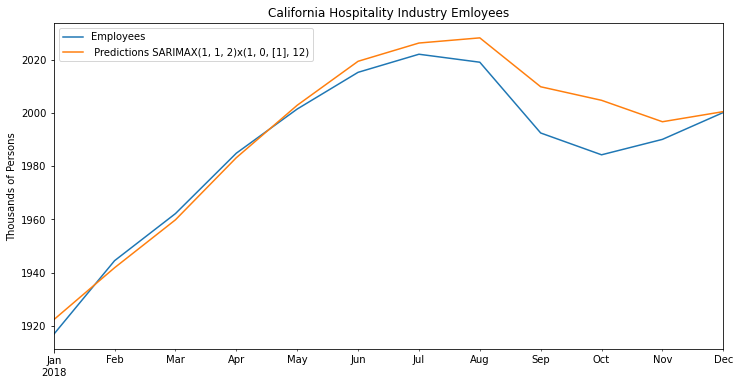

In [8]:
# ваш код
title = 'California Hospitality Industry Emloyees'
ylabel='Thousands of Persons'
xlabel=''

ax = test['Employees'].plot(legend=True,figsize=(12,6),title=title)
predictions.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)
ax.legend(loc='upper left');

### 8. Оцените качество модели с помощью MSE и RMSE


In [33]:
# Подсказка: используйте функции mean_squared_error и rmse 
print(f'SARIMAX(1, 1, 2)x(1, 0, [1], 12) MSE Error: {mse_value:11.10}')
print(f'SARIMAX(1, 1, 2)x(1, 0, [1], 12) RMSE Error: {rmse_value:11.10}')

SARIMAX(1, 1, 2)x(1, 0, [1], 12) MSE Error: 77.64833237
SARIMAX(1, 1, 2)x(1, 0, [1], 12) RMSE Error: 8.811829116


In [10]:
from sklearn.metrics import mean_squared_error

error = mean_squared_error(test['Employees'], predictions)
print(f'SARIMAX(1, 1, 2)x(1, 0, [1], 12) MSE Error: {error:11.10}')

from statsmodels.tools.eval_measures import rmse
error = rmse(test['Employees'], predictions)
print(f'SARIMAX(1, 1, 2)x(1, 0, [1], 12) RMSE Error: {error:11.10}')


SARIMAX(1, 1, 2)x(1, 0, [1], 12) MSE Error: 77.62798355
SARIMAX(1, 1, 2)x(1, 0, [1], 12) RMSE Error: 8.810674409


In [9]:
# ваш код


SARIMA(0,1,0)(2,0,0,12) MSE Error: 182.8506646
SARIMA(0,1,0)(2,0,0,12) RMSE Error: 13.52222854


In [11]:
model = SARIMAX(train['Employees'], order=(0, 1, 0), seasonal_order=(2, 0, 0, 12))
results = model.fit()
results.summary()

start=len(train)
end=len(train)+len(test)-1
predictions = results.predict(start=start, end=end, dynamic=False, typ='levels').rename('SARIMA(0, 1, 0)x(2, 0, 0, 12) ')

from sklearn.metrics import mean_squared_error

error = mean_squared_error(test['Employees'], predictions)
print(f'SARIMA(0, 1, 0)x(2, 0, 0, 12) MSE Error: {error:11.10}')

from statsmodels.tools.eval_measures import rmse
error = rmse(test['Employees'], predictions)
print(f'SARIMA(0, 1, 0)x(2, 0, 0, 12) RMSE Error: {error:11.10}')


SARIMA(0, 1, 0)x(2, 0, 0, 12) MSE Error: 182.8506626
SARIMA(0, 1, 0)x(2, 0, 0, 12) RMSE Error: 13.52222846


### 9. Натренируйте модель на полном датасете и предскажите на год вперед

In [34]:
model = [ваш код]
results = model.fit()
results.summary()

/Users/vladimirivanov/Anaconda/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:963: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/vladimirivanov/Anaconda/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:975: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/vladimirivanov/Anaconda/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:994: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                            Employees   No. Observations:                  348
Model:             SARIMAX(1, 1, 2)x(1, 0, [1], 12)   Log Likelihood               -1098.252
Date:                              Sun, 07 Mar 2021   AIC                           2208.504
Time:                                      09:53:02   BIC                           2231.600
Sample:                                  01-01-1990   HQIC                          2217.700
                                       - 12-01-2018                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9246      0.045     20.473      0.000       0.836       1.013
ma.L1         -0.9440      0.069    -13.765      0.000      -1.078      -0.810
ma.L2          0.1286      0.058      2.212      0.027       0.015       0.243
ar.S.L12       0.9972      0.001    702.406      0.000       0.994       1.000
ma.S.L12      -0.7490      0.043    -17.340      0.000      -0.834      -0.664
sigma2        29.2968      1.717     17.062      0.000      25.931      32.662
===================================================================================
Ljung-Box (Q):                       31.48   Jarque-Bera (JB):                67.46
Prob(Q):                              0.83   Prob(JB):                         0.00
Heteroskedasticity (H):               0.86   Skew:                            -0.11
Prob(H) (two-sided):                  0.40   Kurtosis:                         5.15
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [7]:
model = SARIMAX(df['Employees'],order=(1, 1, 2),seasonal_order=(1, 0, [1], 12))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                            Employees   No. Observations:                  348
Model:             SARIMAX(1, 1, 2)x(1, 0, [1], 12)   Log Likelihood               -1098.252
Date:                              Mon, 07 Mar 2022   AIC                           2208.504
Time:                                      00:54:32   BIC                           2231.600
Sample:                                  01-01-1990   HQIC                          2217.700
                                       - 12-01-2018                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9246      0.045     20.572      0.000       0.836       1.013
ma.L1         -0.9441      0.070    -13.541      0.000      -1.081      -0.807
ma.L2          0.1287      0.060      2.157      0.031       0.012       0.246
ar.S.L12       0.9972      0.001    706.317      0.000       0.994       1.000
ma.S.L12      -0.7494      0.043    -17.353      0.000      -0.834      -0.665
sigma2        29.2905      1.716     17.068      0.000      25.927      32.654
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                67.40
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               0.86   Skew:                            -0.11
Prob(H) (two-sided):                  0.40   Kurtosis:                         5.15
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [8]:
# для прогнозирования используйте с нужными параметрами results.predict() -- см. выше
fcast = results.predict(len(df),len(df)+123,typ='levels').rename('SARIMA(1, 1, 2)x(1, 0, [1], 12) Forecast')

### 10. Постройте график предсказаний и график исходных данных


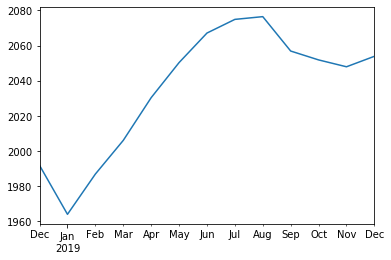

In [ ]:
fcast.plot()

In [ ]:
#???

import matplotlib.pyplot as plt

fig, ax1=plt.subplots(figsize=(8, 4))
ax2=ax1.twinx()

ax1.plot(fcast['2018-Dec':'2019-Dec'])
ax2.plot(df['2018-Dec':'2019-Dec']) 


<AxesSubplot:>

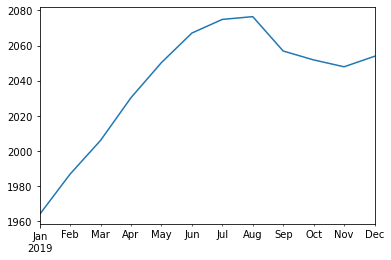

In [10]:
#???
fcast['2018-Dec':'2019-Dec'].plot()

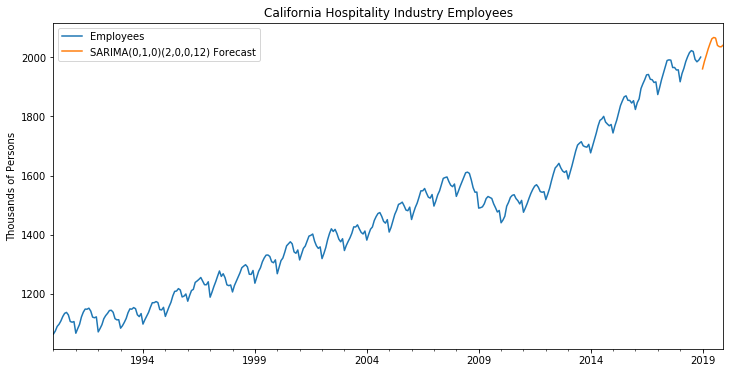

In [11]:
# отобразите общий график

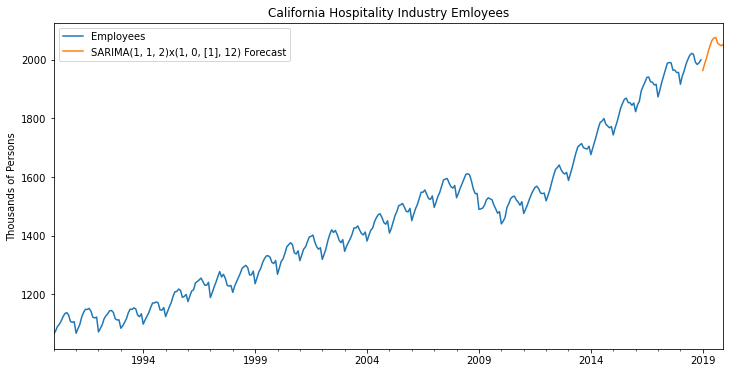

In [11]:
title = 'California Hospitality Industry Emloyees'
ylabel='Thousands of Persons'
xlabel=''

ax1 = df['Employees'].plot(figsize=(12,6),title=title)
ax1.autoscale(axis='x',tight=True)
ax1.set(xlabel=xlabel, ylabel=ylabel);


ax2 = fcast[:'2019'].plot(legend=True,figsize=(12,6),title=title)
ax2.autoscale(axis='x',tight=True)
ax2.set(xlabel=xlabel, ylabel=ylabel)
ax2.legend(loc='upper left');